In [ ]:
# loading packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# load data
train = pd.read_csv('/content/drive/MyDrive/pandas/loan_sanction_train.csv')
test  = pd.read_csv('/content/drive/MyDrive/pandas/loan_sanction_test.csv')
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
# copy the data
train_original= train.copy()
test_original= test.copy()

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
train.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
train.shape, test.shape

((614, 13), (367, 12))

In [ ]:
# target variable
train['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [ ]:
# Normalize can be set t0 True to print proportions instead of numbers
train['Loan_Status'].value_counts(normalize=True)

,proportion
Loan_Status,
Y,0.687296
N,0.312704


<Axes: xlabel='Loan_Status'>

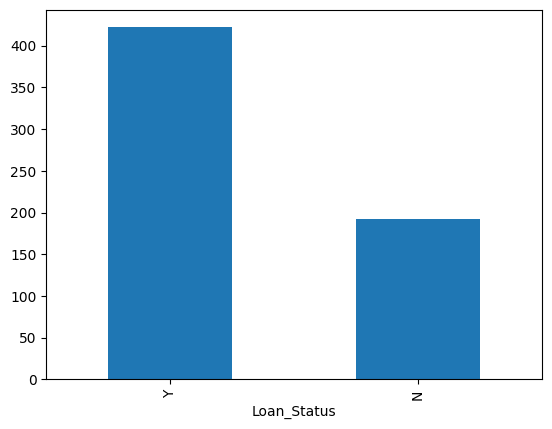

In [ ]:
train['Loan_Status'].value_counts().plot.bar()

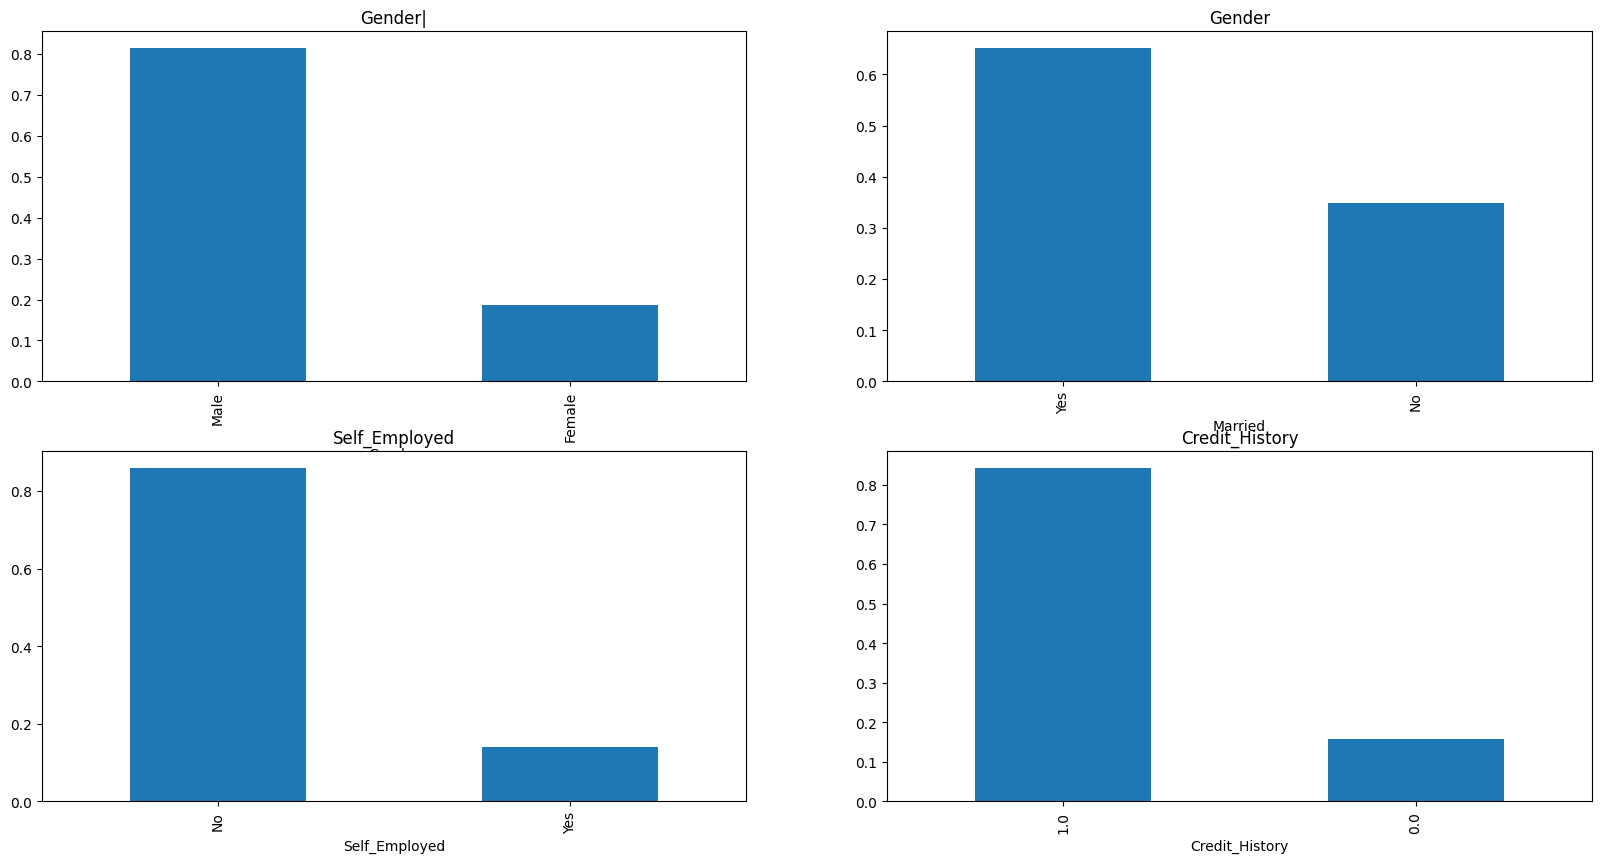

In [ ]:
# Independent Variable (Categorical Data)
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender|')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Gender')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

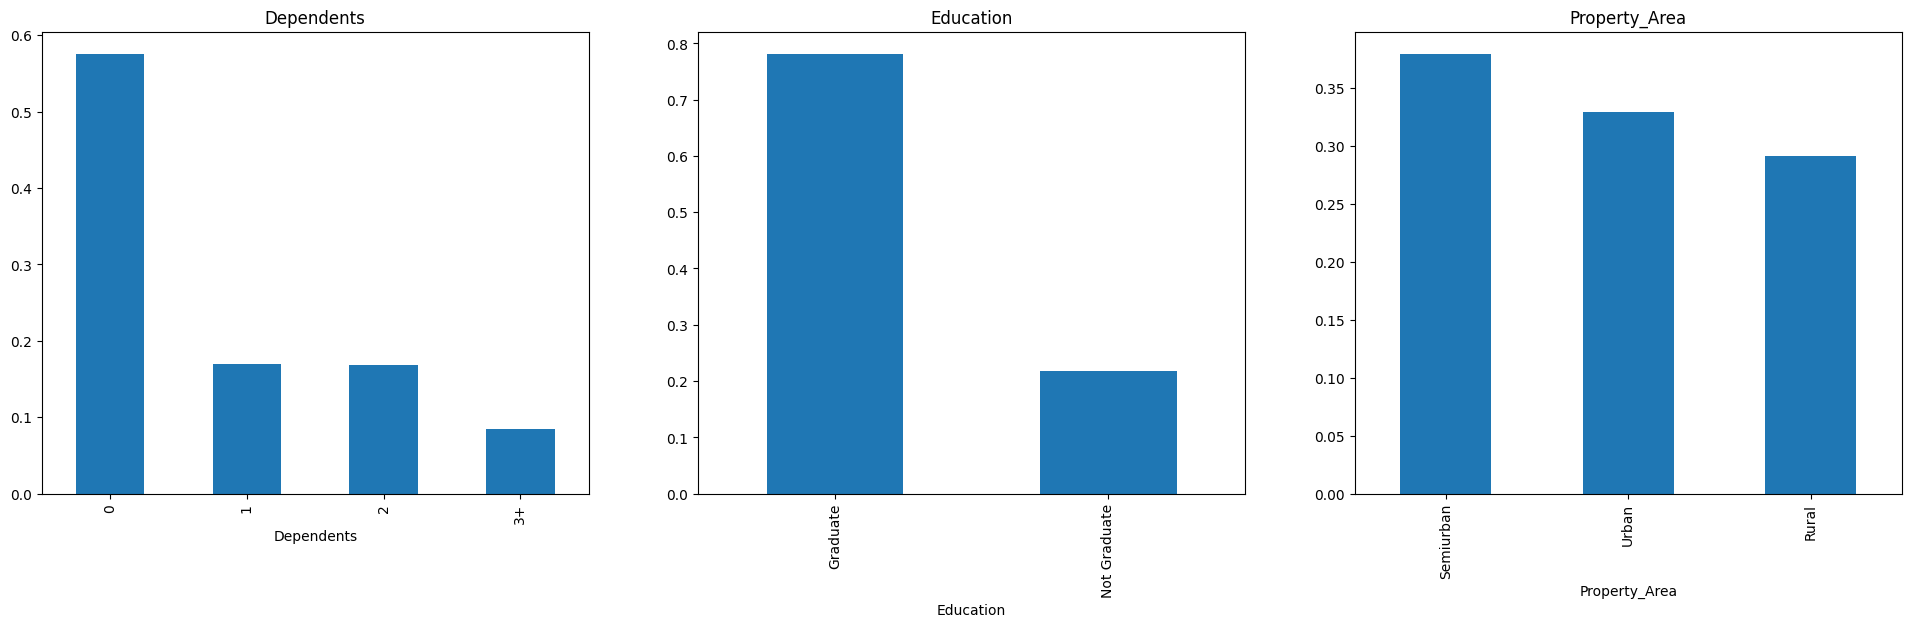

In [ ]:
# Independent Variable(Ordinal)
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

plt.show()

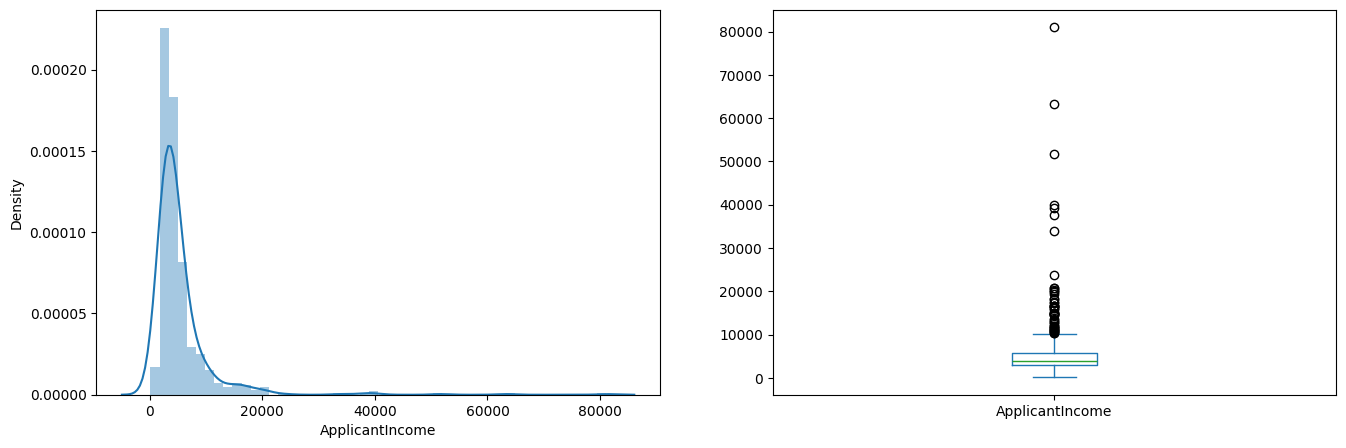

In [ ]:
# Independent Variable(Numerical)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

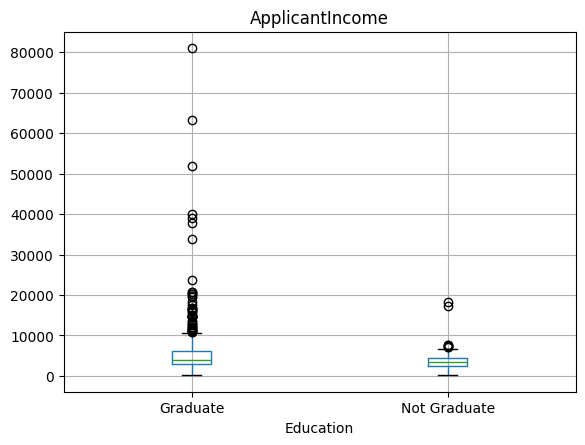

In [ ]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')

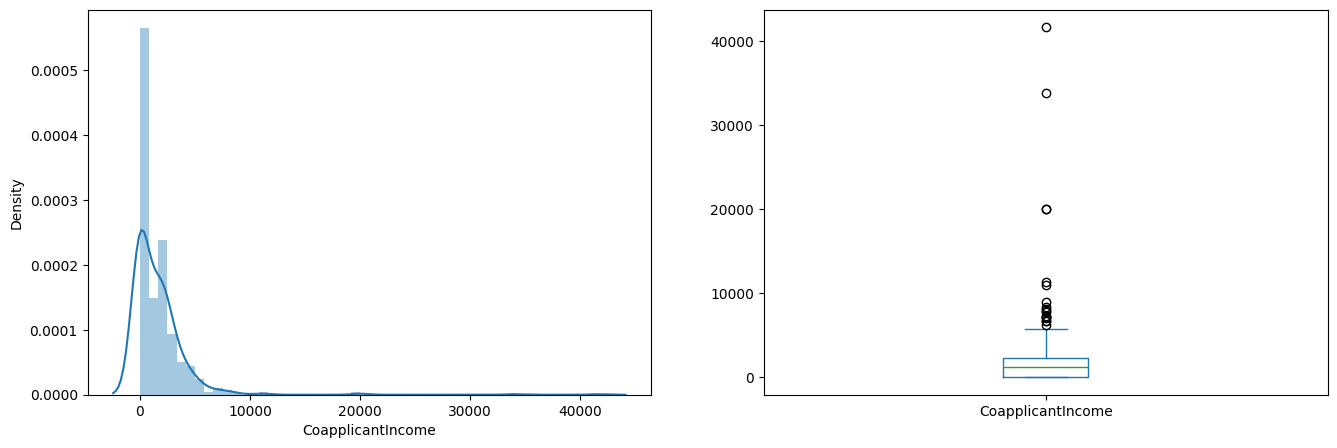

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

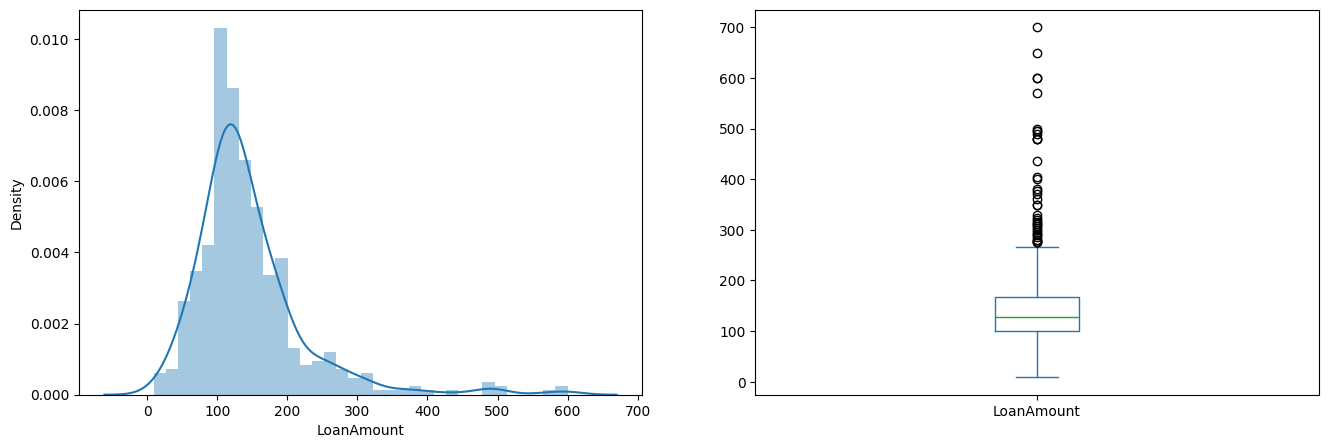

In [ ]:
plt.figure(1)
plt.subplot(121)
df= train.dropna()
sns.distplot(df['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

<Axes: xlabel='Gender'>

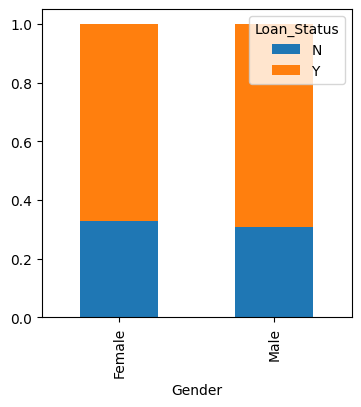

In [ ]:
#Categorical Independent Variable v/s Target Variable
Gender= pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1). astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4))

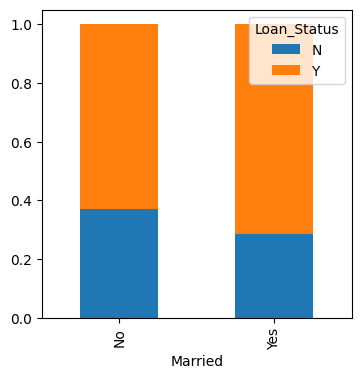

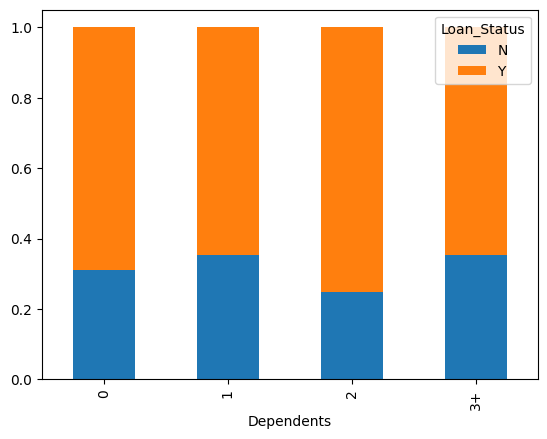

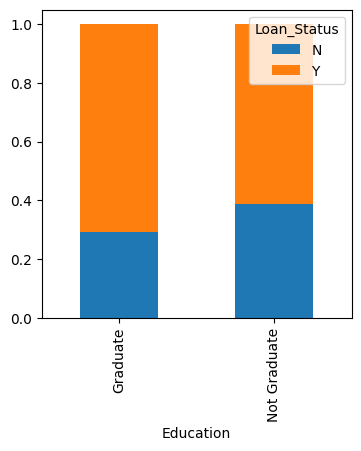

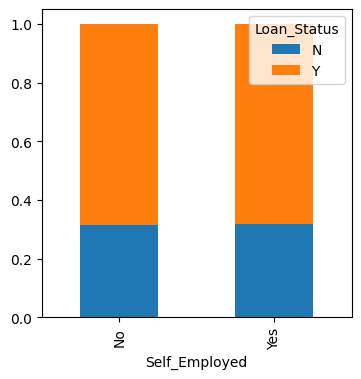

In [ ]:
# visualize remaning categorical variables vs target variable
Married= pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education= pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed= pd.crosstab(train['Self_Employed'], train['Loan_Status'])


Married. div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

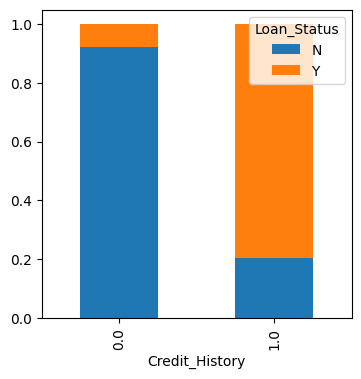

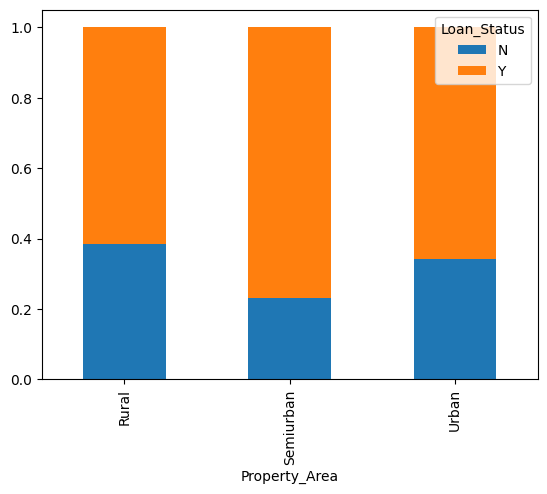

In [ ]:
Credit_History= pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Property_Area= pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

<Axes: xlabel='Loan_Status'>

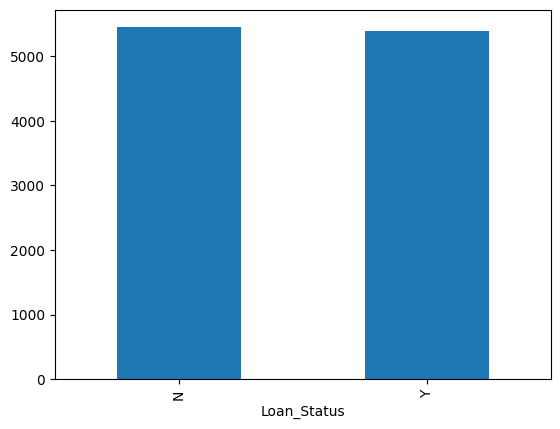

In [ ]:
#Numerical Independent Variable vs Target Variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

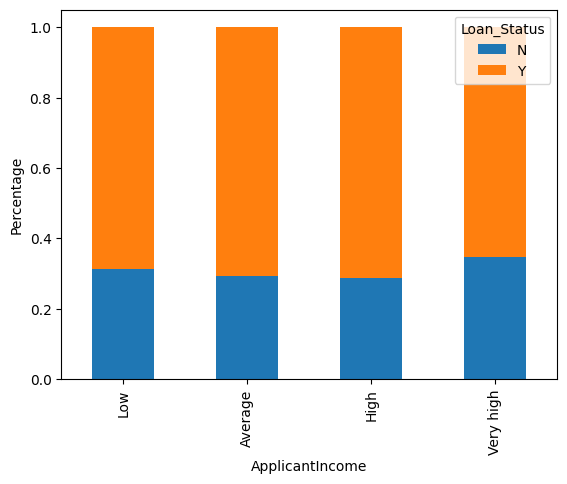

In [ ]:
bins=[0,2500, 4000, 6000, 81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']= pd.cut(df['ApplicantIncome'], bins, labels=group)
Income_bin= pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('ApplicantIncome')
P= plt.ylabel('Percentage')

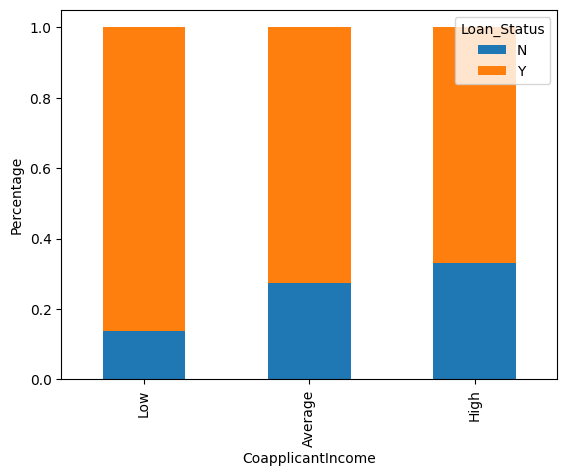

In [ ]:
bins= [0, 1000,3000, 42000]
group=['Low', 'Average','High']
train['CoapplicantIncome']= pd.cut(train['CoapplicantIncome'],bins, labels=group)
Coapplicant_Income_bin= pd.crosstab(train['CoapplicantIncome'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('CoapplicantIncome')
P= plt.ylabel('Percentage')

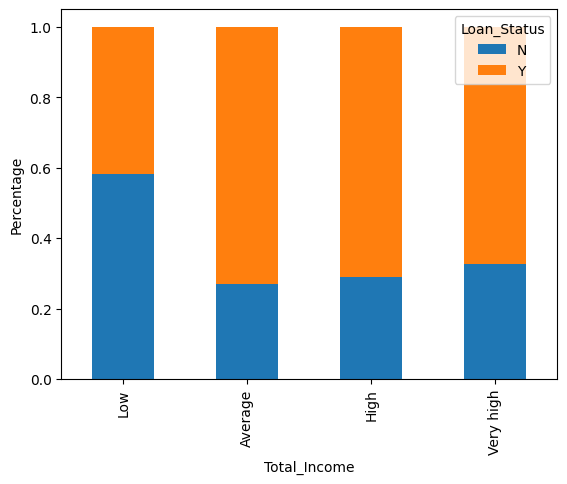

In [ ]:
train['Total_Income']= train['ApplicantIncome']+train_original['CoapplicantIncome']
bins=[0,2500, 4000, 6000, 81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']= pd.cut(train['Total_Income'],bins, labels= group)
Total_Income_bin= pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total_Income')
P= plt.ylabel('Percentage')

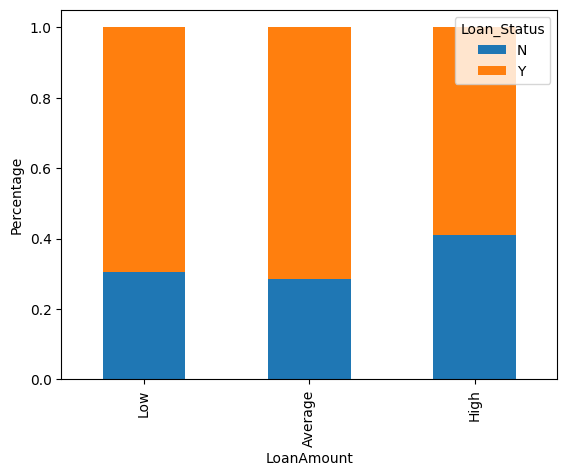

In [ ]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [ ]:
# train['Income_status']= train.groupby(['Income_bin', 'Loan_Status'])['Loan_Status'].count().reset_index()
# train['Income_status'].rename(columns={'Loan_Status': 'Count'}, inplace=True)

In [ ]:
train= train.drop(['Income_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+',3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

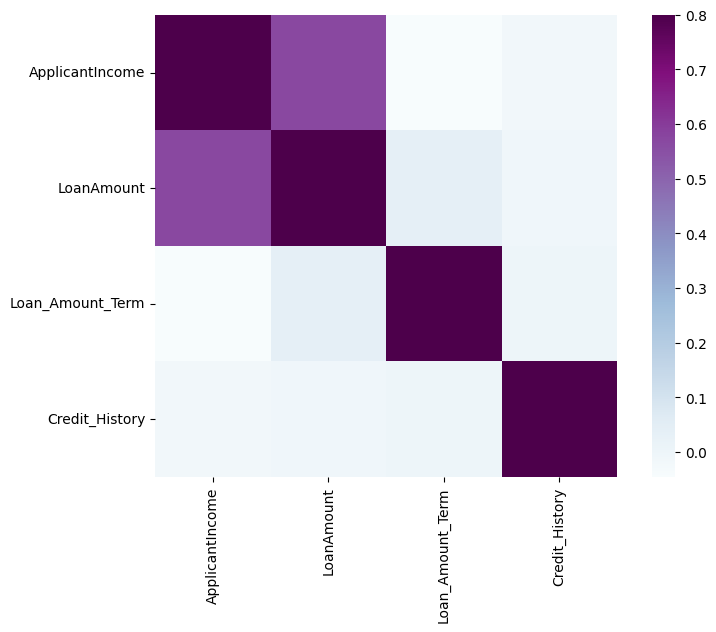

In [ ]:
train = train.drop(['LoanAmount_bin', 'CoapplicantIncome'], axis=1)
numerical_cols = train.select_dtypes(include=np.number).columns.tolist()
matrix = train[numerical_cols].drop('Loan_Status', axis=1).corr()
f,ax= plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu');

train['LoanAmount_bin'].fillna(train['LoanAmount_bin'].mode()[0], inplace= True)

In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [ ]:
train['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)


In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace= True)


In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
# For Test Data
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

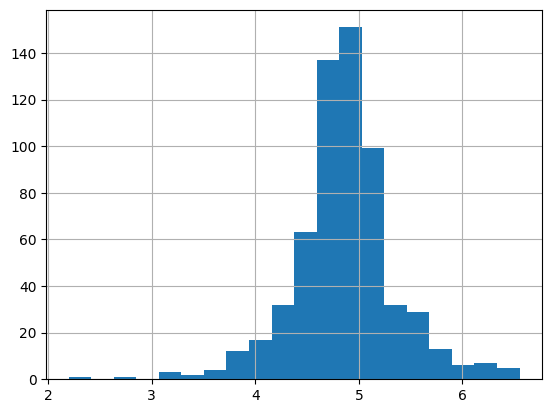

In [ ]:
# Outlier Treatment
train['LoanAmount_log']= np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']= np.log(test['LoanAmount'])

In [ ]:
# Evaluation metrics
train= train.drop('Loan_ID', axis=1)
test= test.drop('Loan_ID', axis=1)

In [ ]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'LoanAmount_log'],
      dtype='object')

In [ ]:
# Separate features (X) and target (y)
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

# Apply one-hot encoding to categorical variables
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv,y_train, y_cv= train_test_split(X,y, test_size=0.3, random_state=42) # Added random_state for reproducibility

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fill remaining missing values with the mean
x_train = x_train.fillna(x_train.mean())
x_cv = x_cv.fillna(x_cv.mean())

model= LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
pred_cv= model.predict(x_cv)
accuracy_score(y_cv, pred_cv)

0.7837837837837838

In [ ]:
x_train

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
553,2454,181.0,360.0,0.0,5.198497,False,True,False,True,False,True,False,False,False,True,True,False,False,False,True
601,2894,155.0,360.0,1.0,5.043425,False,True,False,True,False,True,False,False,False,True,True,False,True,False,False
261,2060,134.0,360.0,1.0,4.897840,False,True,True,False,False,True,False,False,True,False,True,False,False,True,False
496,2600,107.0,360.0,1.0,4.672829,False,True,False,True,False,True,False,False,False,True,True,False,True,False,False
529,6783,130.0,360.0,1.0,4.867534,False,True,True,False,False,True,False,False,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1875,97.0,360.0,1.0,4.574711,False,True,False,True,False,False,False,True,False,True,False,True,False,True,False
106,11417,225.0,360.0,1.0,5.416100,False,True,False,True,False,False,False,True,True,False,True,False,False,False,True
270,3237,30.0,360.0,1.0,3.401197,True,False,True,False,False,True,False,False,True,False,True,False,False,False,True
435,10047,128.0,240.0,1.0,4.852030,True,False,False,True,False,True,False,False,True,False,True,False,False,True,False


In [ ]:
test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
1,3076,1500,126.0,360.0,1.0,4.836282,False,True,False,True,...,False,True,False,True,False,True,False,False,False,True
2,5000,1800,208.0,360.0,1.0,5.337538,False,True,False,True,...,False,False,True,True,False,True,False,False,False,True
3,2340,2546,100.0,360.0,1.0,4.605170,False,True,False,True,...,False,False,True,True,False,True,False,False,False,True
4,3276,0,78.0,360.0,1.0,4.356709,False,True,True,False,...,True,False,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,4.727388,False,True,False,True,...,False,False,False,False,True,False,True,False,False,True
363,4158,709,115.0,360.0,1.0,4.744932,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
364,3250,1993,126.0,360.0,1.0,4.836282,False,True,True,False,...,True,False,False,True,False,True,False,False,True,False
365,5000,2393,158.0,360.0,1.0,5.062595,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False


In [ ]:
train.columns

Index(['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [ ]:
test.columns

Index(['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'LoanAmount_log', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_3', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [ ]:
# Ensure the test set has the same columns as the training set
test = test[x_train.columns]

pred_test = model.predict(test)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
i=1
kf= StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
  print('\n{} of Kfold {}'.format(i,kf.n_splits))
  xtr, xvl = X.loc[train_index],X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]
  model= LogisticRegression(random_state=1)
  model.fit(xtr,ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)
  print('accuracy_score', score)
  i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of Kfold 5
accuracy_score 0.7967479674796748

2 of Kfold 5
accuracy_score 0.8373983739837398

3 of Kfold 5
accuracy_score 0.7967479674796748

4 of Kfold 5
accuracy_score 0.7804878048780488

5 of Kfold 5
accuracy_score 0.8032786885245902


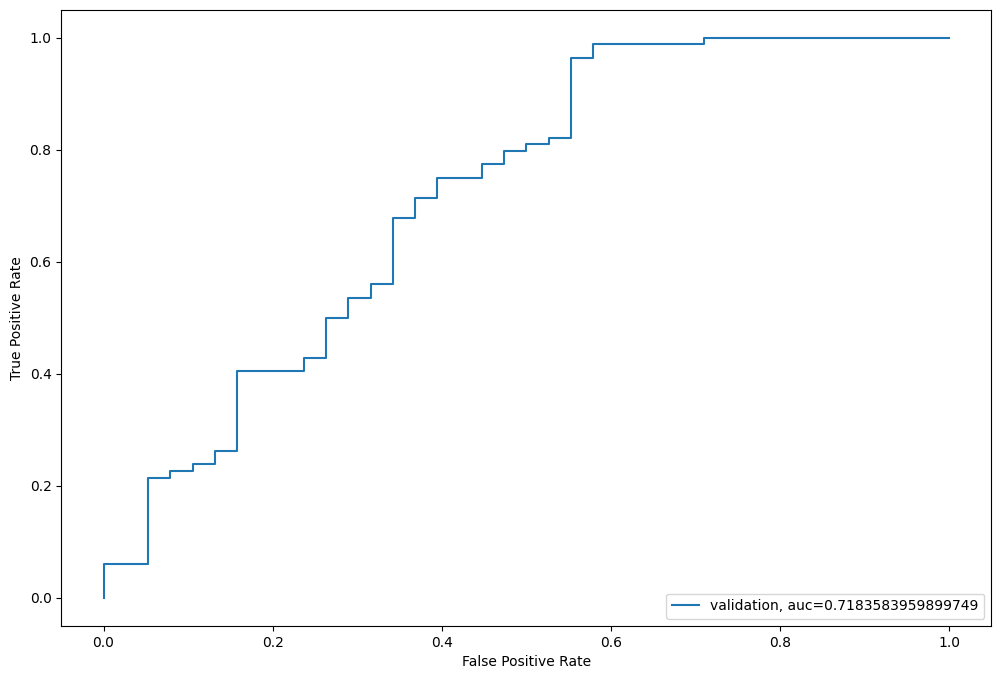

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc= metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
train['Total_Income']= train['ApplicantIncome']+train_original['CoapplicantIncome']
test['Total_Income']= test['ApplicantIncome']+test_original['CoapplicantIncome']

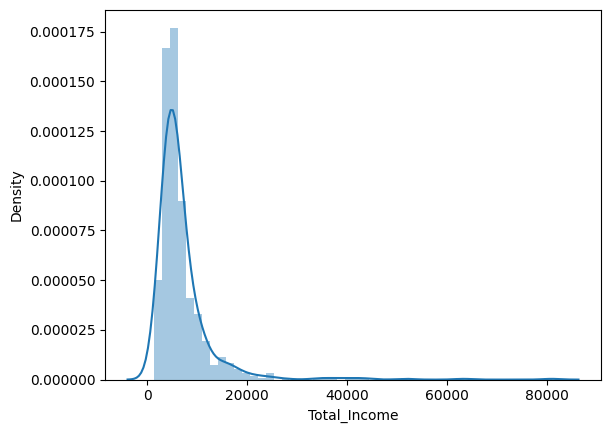

In [ ]:
sns.distplot(train['Total_Income']);

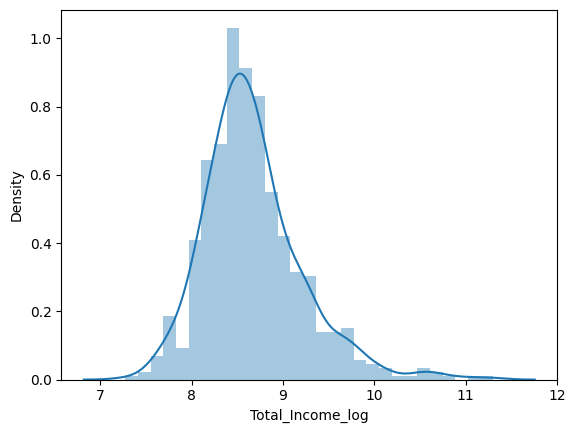

In [ ]:
train['Total_Income_log']= np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log']= np.log(test['Total_Income'])

In [ ]:
train['EMI']= train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']= test['LoanAmount']/test['Loan_Amount_Term']

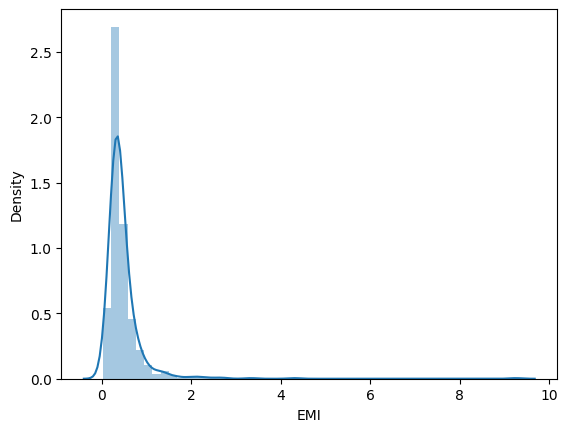

In [ ]:
sns.distplot(train['EMI']);

<Axes: xlabel='Balance Income', ylabel='Density'>

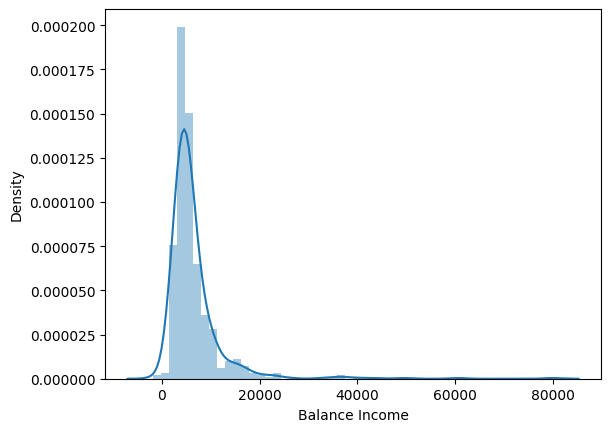

In [ ]:
train['Balance Income']= train['Total_Income']- (train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

In [ ]:
train=train.drop(['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [ ]:
X= train.drop('Loan_Status', axis=1)
y= train.Loan_Status

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForestClassifier()